In [14]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [11]:
agg_df = pd.DataFrame()

workdir_path = 'aggregated_yearly_from_wos'
for root, dirs, files in os.walk(workdir_path):
    for filename in files:
        path=os.path.join(root, filename)
        chunk = pd.read_csv(path, sep='\t')[["Publication Years","Record Count"]]
        chunk["name"] = filename.replace(".txt","")
        agg_df = pd.concat([chunk,agg_df],ignore_index=True)

In [12]:
agg_df["name"].unique()

array(['worldwide_kwds', 'eu_kwds', 'eu_all', 'eu+assoc_kwds',
       'eu+assoc_all', 'ch_kwds', 'ch_all'], dtype=object)

In [13]:
agg_df["region"] = agg_df["name"].apply(lambda x: x.split("_")[0])
agg_df["field"] = agg_df["name"].apply(lambda x: x.split("_")[-1])
agg_df

Publication Years  Record Count            name     region field
0                2022        211014  worldwide_kwds  worldwide  kwds
1                2021        197916  worldwide_kwds  worldwide  kwds
2                2020        160472  worldwide_kwds  worldwide  kwds
3                2019        142010  worldwide_kwds  worldwide  kwds
4                2018        109746  worldwide_kwds  worldwide  kwds
..                ...           ...             ...        ...   ...
79               2015        393759          ch_all         ch   all
80               2014        362784          ch_all         ch   all
81               2013        329772          ch_all         ch   all
82               2012        299804          ch_all         ch   all
83               2011        263715          ch_all         ch   all

[84 rows x 5 columns]

Text(0.5, 1.0, 'Number of WOS indexed piublications')

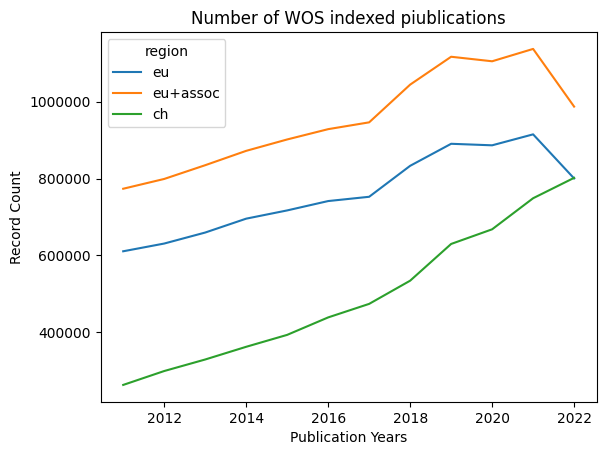

In [34]:
g = sns.lineplot(agg_df[agg_df["field"]=="all"],x="Publication Years" ,y="Record Count", hue="region")
g.ticklabel_format(style='plain', axis='y',useOffset=False)
g.set_title("Number of WOS indexed piublications")

Text(0.5, 1.0, 'AI-related publications')

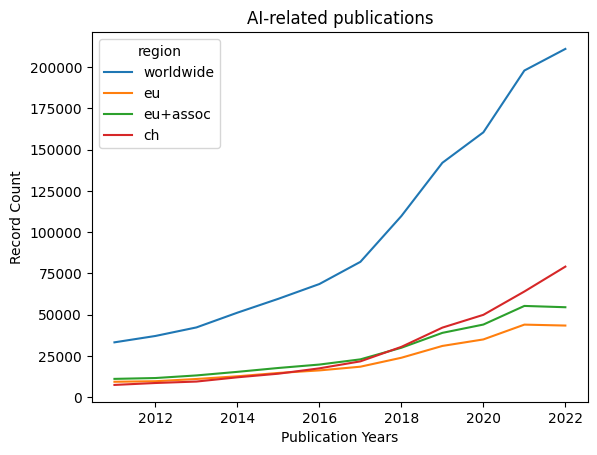

In [33]:
g = sns.lineplot(agg_df[agg_df["field"]=="kwds"],x="Publication Years" ,y="Record Count", hue="region")
g.set_title("AI-related publications")

Text(0.5, 1.0, 'AI-related publications\n(without worldwide trend)')

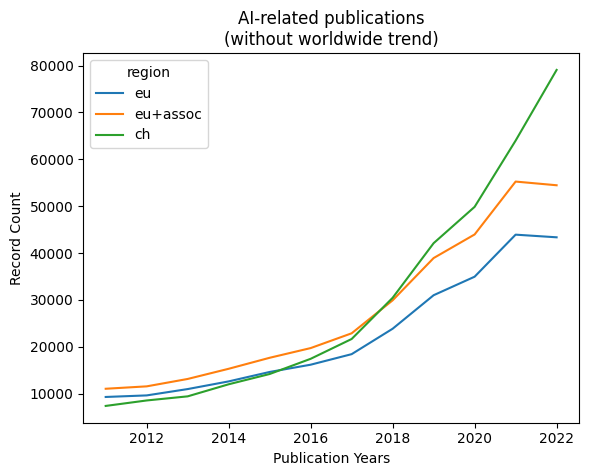

In [36]:
g = sns.lineplot(agg_df[((agg_df["field"]=="kwds")&(agg_df["region"]!="worldwide"))],x="Publication Years" ,y="Record Count", hue="region")
g.set_title("AI-related publications\n(without worldwide trend)")

In [55]:
agg_df_p = agg_df[agg_df["field"]=="kwds"].merge(
    agg_df[agg_df["field"]=="all"].rename(columns={"Record Count":"All"}),
    on=["Publication Years","region"]).merge(
    agg_df[agg_df["region"]=="worldwide"][["Publication Years","Record Count"]].rename(columns={"Record Count":"Worldwide"}),
    on="Publication Years")
agg_df_p["percent"] = agg_df_p["Record Count"]/agg_df_p["All"]
agg_df_p["share"] = agg_df_p["Record Count"]/agg_df_p["Worldwide"]

Text(0.5, 1.0, 'Focus on AI-related publications\n(percent of publications of the yearly output)')

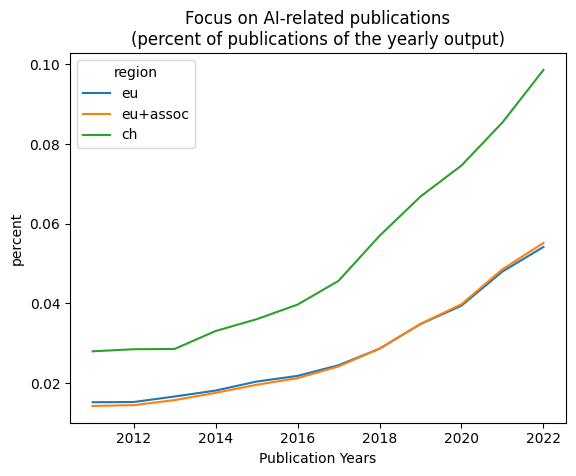

In [56]:
g = sns.lineplot(agg_df_p,x="Publication Years" ,y="percent", hue="region")
g.set_title("Focus on AI-related publications\n(percent of publications of the yearly output)")

Text(0.5, 1.0, 'Share of publications of the worldwide AI-related output')

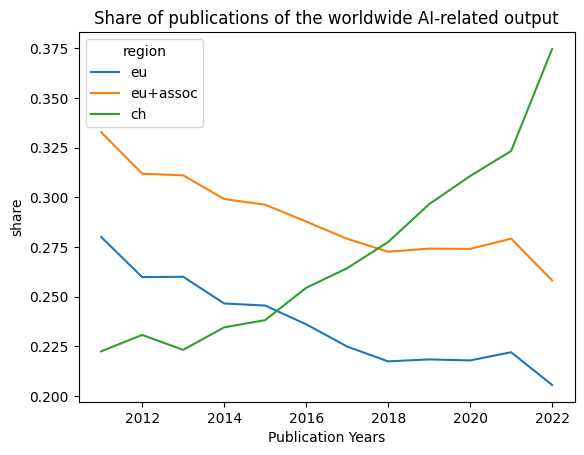

In [61]:
g = sns.lineplot(agg_df_p,x="Publication Years" ,y="share", hue="region")
g.set_title("Share of publications of the worldwide AI-related output")

In [54]:
agg_df_p

Publication Years  Record Count         name_x    region field_x      All   
0                2021         43927        eu_kwds        eu    kwds   914776  \
1                2021         55254  eu+assoc_kwds  eu+assoc    kwds  1136750   
2                2021         63992        ch_kwds        ch    kwds   748798   
3                2022         43361        eu_kwds        eu    kwds   800220   
4                2022         54467  eu+assoc_kwds  eu+assoc    kwds   986893   
5                2022         79078        ch_kwds        ch    kwds   801793   
6                2020         34956        eu_kwds        eu    kwds   886298   
7                2020         43969  eu+assoc_kwds  eu+assoc    kwds  1104653   
8                2020         49861        ch_kwds        ch    kwds   668057   
9                2019         31006        eu_kwds        eu    kwds   890256   
10               2019         38935  eu+assoc_kwds  eu+assoc    kwds  1116403   
11               2019         42111        ch_kwds        ch    kwds   630002   
12               2018         23854        eu_kwds        eu    kwds   833011   
13               2018         29913  eu+assoc_kwds  eu+assoc    kwds  1043953   
14               2018         30454        ch_kwds        ch    kwds   534539   
15               2017         18429        eu_kwds        eu    kwds   752558   
16               2017         22878  eu+assoc_kwds  eu+assoc    kwds   945964   
17               2017         21664        ch_kwds        ch    kwds   474295   
18               2016         16178        eu_kwds        eu    kwds   741454   
19               2016         19724  eu+assoc_kwds  eu+assoc    kwds   928272   
20               2016         17436        ch_kwds        ch    kwds   439134   
21               2015         14628        eu_kwds        eu    kwds   717129   
22               2015         17655  eu+assoc_kwds  eu+assoc    kwds   901491   
23               2015         14191        ch_kwds        ch    kwds   393759   
24               2014         12615        eu_kwds        eu    kwds   695713   
25               2014         15308  eu+assoc_kwds  eu+assoc    kwds   871908   
26               2014         12000        ch_kwds        ch    kwds   362784   
27               2013         10979        eu_kwds        eu    kwds   659641   
28               2013         13136  eu+assoc_kwds  eu+assoc    kwds   834592   
29               2013          9424        ch_kwds        ch    kwds   329772   
30               2012          9626        eu_kwds        eu    kwds   631054   
31               2012         11557  eu+assoc_kwds  eu+assoc    kwds   798881   
32               2012          8547        ch_kwds        ch    kwds   299804   
33               2011          9293        eu_kwds        eu    kwds   610960   
34               2011         11044  eu+assoc_kwds  eu+assoc    kwds   773469   
35               2011          7382        ch_kwds        ch    kwds   263715   

          name_y field_y  Worldwide   percent     share  
0         eu_all     all     197916  0.048019  0.221948  
1   eu+assoc_all     all     197916  0.048607  0.279179  
2         ch_all     all     197916  0.085460  0.323329  
3         eu_all     all     211014  0.054186  0.205489  
4   eu+assoc_all     all     211014  0.055190  0.258120  
5         ch_all     all     211014  0.098626  0.374752  
6         eu_all     all     160472  0.039440  0.217832  
7   eu+assoc_all     all     160472  0.039803  0.273998  
8         ch_all     all     160472  0.074636  0.310715  
9         eu_all     all     142010  0.034828  0.218337  
10  eu+assoc_all     all     142010  0.034875  0.274171  
11        ch_all     all     142010  0.066843  0.296535  
12        eu_all     all     109746  0.028636  0.217356  
13  eu+assoc_all     all     109746  0.028654  0.272566  
14        ch_all     all     109746  0.056972  0.277495  
15        eu_all     all      81974  0.024488  0.224815  
16  eu+assoc_all    

In [60]:
agg_df_p[["Record Count","Worldwide","share"]]

Record Count  Worldwide     share
0          43927     197916  0.221948
1          55254     197916  0.279179
2          63992     197916  0.323329
3          43361     211014  0.205489
4          54467     211014  0.258120
5          79078     211014  0.374752
6          34956     160472  0.217832
7          43969     160472  0.273998
8          49861     160472  0.310715
9          31006     142010  0.218337
10         38935     142010  0.274171
11         42111     142010  0.296535
12         23854     109746  0.217356
13         29913     109746  0.272566
14         30454     109746  0.277495
15         18429      81974  0.224815
16         22878      81974  0.279088
17         21664      81974  0.264279
18         16178      68538  0.236044
19         19724      68538  0.287782
20         17436      68538  0.254399
21         14628      59591  0.245473
22         17655      59591  0.296270
23         14191      59591  0.238140
24         12615      51174  0.246512
25         15308      51174  0.299136
26         12000      51174  0.234494
27         10979      42229  0.259987
28         13136      42229  0.311066
29          9424      42229  0.223164
30          9626      37054  0.259783
31         11557      37054  0.311896
32          8547      37054  0.230663
33          9293      33189  0.280002
34         11044      33189  0.332761
35          7382      33189  0.222423